In [10]:
# Import Library
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

In [11]:
df = pd.read_csv('https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/synthetic_coffee_health.csv')
df.head()

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10000 non-null  int64  
 1   Age                      10000 non-null  int64  
 2   Gender                   10000 non-null  object 
 3   Country                  10000 non-null  object 
 4   Coffee_Intake            10000 non-null  float64
 5   Caffeine_mg              10000 non-null  float64
 6   Sleep_Hours              10000 non-null  float64
 7   Sleep_Quality            10000 non-null  object 
 8   BMI                      10000 non-null  float64
 9   Heart_Rate               10000 non-null  int64  
 10  Stress_Level             10000 non-null  object 
 11  Physical_Activity_Hours  10000 non-null  float64
 12  Health_Issues            4059 non-null   object 
 13  Occupation               10000 non-null  object 
 14  Smoking                

In [13]:
df.describe()

,ID,Age,Coffee_Intake,Caffeine_mg,Sleep_Hours,BMI,Heart_Rate,Physical_Activity_Hours,Smoking,Alcohol_Consumption
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000
mean,5000.50000,34.949100,2.509230,238.411010,6.636220,23.986860,70.617800,7.48704,0.20040,0.300700
std,2886.89568,11.160939,1.450248,137.748815,1.222055,3.906411,9.822951,4.31518,0.40032,0.458585
min,1.00000,18.000000,0.000000,0.000000,3.000000,15.000000,50.000000,0.00000,0.00000,0.000000
25%,2500.75000,26.000000,1.500000,138.750000,5.800000,21.300000,64.000000,3.70000,0.00000,0.000000
50%,5000.50000,34.000000,2.500000,235.400000,6.600000,24.000000,71.000000,7.50000,0.00000,0.000000
75%,7500.25000,43.000000,3.500000,332.025000,7.500000,26.600000,77.000000,11.20000,0.00000,1.000000
max,10000.00000,80.000000,8.200000,780.300000,10.000000,38.200000,109.000000,15.00000,1.00000,1.000000


In [14]:
null_counts = df.isnull().sum()
null_percentages = (null_counts / len(df)) * 100

# Buat DataFrame khusus kolom yang punya null
null_df = pd.DataFrame({
    'Null Count': null_counts,
    'Null Percentage': null_percentages
})
null_df = null_df[null_df['Null Count'] > 0]

# Format persentase
null_df['Null Percentage'] = null_df['Null Percentage'].map('{:.2f}%'.format)

null_df

,Null Count,Null Percentage
Health_Issues,5941,59.41%


In [15]:
# Imputasi missing values
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:   # kalau numerik pakai median
        df[col].fillna(df[col].median(), inplace=True)
    else:                                       # kalau kategorikal pakai mode
        df[col].fillna(df[col].mode()[0], inplace=True)

# cek lagi apakah masih ada missing
print(df.isnull().sum())

ID                         0
Age                        0
Gender                     0
Country                    0
Coffee_Intake              0
Caffeine_mg                0
Sleep_Hours                0
Sleep_Quality              0
BMI                        0
Heart_Rate                 0
Stress_Level               0
Physical_Activity_Hours    0
Health_Issues              0
Occupation                 0
Smoking                    0
Alcohol_Consumption        0
dtype: int64


C:\Users\Angeline O.L\AppData\Local\Temp\ipykernel_37444\1928289878.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\Angeline O.L\AppData\Local\Temp\ipykernel_37444\1928289878.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

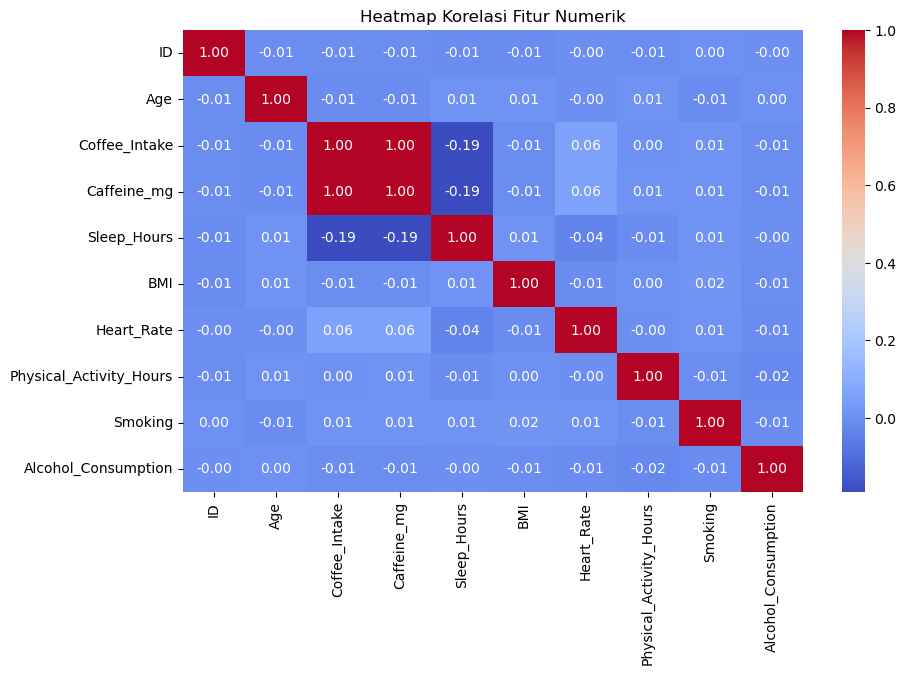

In [17]:
# Heatmap digunakan untuk melihat hubungan antar fitur numerik sehingga pola korelasi mudah dipahami secara visual. Dengan ini kita bisa mengidentifikasi variabel 
# yang saling berkaitan erat maupun yang paling relevan terhadap target.
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Fitur Numerik')
plt.show()

C:\Users\Angeline O.L\AppData\Local\Temp\ipykernel_37444\2928838366.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Stress_Level', palette='pastel')


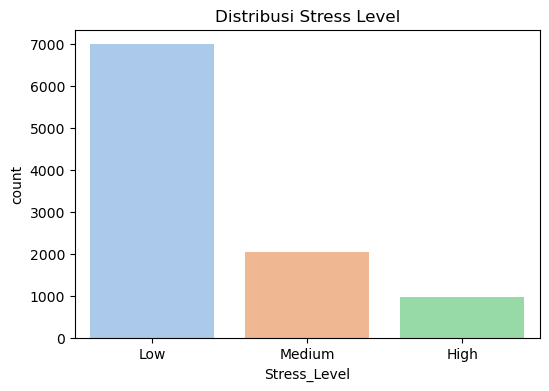

In [18]:
# Bar chart dipilih karena cocok untuk membandingkan frekuensi antar kategori secara jelas dan langsung.
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Stress_Level', palette='pastel')
plt.title('Distribusi Stress Level')
plt.show()

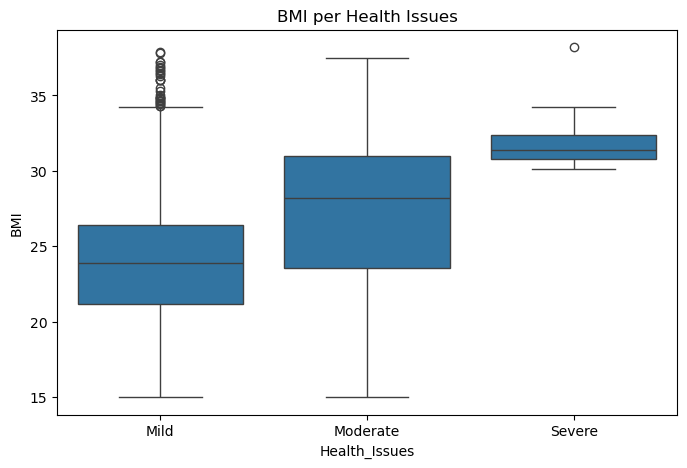

In [19]:
# Boxplot dipilih karena efektif menunjukkan sebaran, median, dan outlier pada setiap kategori.
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Health_Issues', y='BMI')
plt.title('BMI per Health Issues')
plt.show()

## Encoding Categorical Variables

In [20]:
for column in ['Gender', 'Country', 'Sleep_Quality', 'Stress_Level', 'Health_Issues', 'Occupation']:
  print(df[column].unique())

['Male' 'Female' 'Other']
['Germany' 'Brazil' 'Spain' 'Mexico' 'France' 'Canada' 'UK' 'Switzerland'
 'Netherlands' 'Italy' 'China' 'Japan' 'Belgium' 'Finland' 'Australia'
 'USA' 'Sweden' 'India' 'Norway' 'South Korea']
['Good' 'Fair' 'Excellent' 'Poor']
['Low' 'Medium' 'High']
['Mild' 'Moderate' 'Severe']
['Other' 'Service' 'Office' 'Student' 'Healthcare']


In [21]:
# Mapping ordinal
sleep_quality_map = {'Poor': 1, 'Fair': 2, 'Good': 3, 'Excellent': 4}
stress_level_map = {'Low': 1, 'Medium': 2, 'High': 3}
health_issues_map = {'None': 0, 'Mild': 1, 'Moderate': 2, 'Severe': 3}

# Mapping nominal (Occupation, Gender, Country)
gender_map = {'Male': 1, 'Female': 2, 'Other': 3}
occupation_map = {'Office': 1, 'Healthcare': 2, 'Student': 3, 'Service': 4, 'Other': 5}
country_map = {
    'Germany': 1, 'Brazil': 2, 'Spain': 3, 'Mexico': 4, 'France': 5,
    'Canada': 6, 'UK': 7, 'Switzerland': 8, 'Netherlands': 9, 'Italy': 10,
    'China': 11, 'Japan': 12, 'Belgium': 13, 'Finland': 14, 'Australia': 15,
    'USA': 16, 'Sweden': 17, 'India': 18, 'Norway': 19, 'South Korea': 20
}

# Mapping ke DataFrame
df['Sleep_Quality'] = df['Sleep_Quality'].map(sleep_quality_map)
df['Stress_Level'] = df['Stress_Level'].map(stress_level_map)
df['Health_Issues'] = df['Health_Issues'].map(health_issues_map)
df['Gender'] = df['Gender'].map(gender_map)
df['Occupation'] = df['Occupation'].map(occupation_map)
df['Country'] = df['Country'].map(country_map)

df.sample(5)


,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
1490,1491,28,2,2,5.1,480.7,7.0,3,25.3,74,1,3.9,1,3,0,0
3022,3023,30,1,1,1.7,156.9,7.5,3,19.0,60,1,11.2,1,2,1,0
4549,4550,32,2,10,1.8,174.3,8.7,4,24.7,58,1,5.5,1,3,1,0
9495,9496,20,2,20,3.0,286.6,7.4,3,22.2,75,1,11.8,1,5,1,0
4803,4804,26,1,7,1.1,108.0,7.7,3,15.9,70,1,13.1,1,5,1,0


## Declare feature vector and target variable

In [22]:
x = df.drop(['Health_Issues', 'ID'], axis=1)
y = df['Health_Issues']

In [24]:
x.head()

,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Occupation,Smoking,Alcohol_Consumption
0,40,1,1,3.5,328.1,7.5,3,24.9,78,1,14.5,5,0,0
1,33,1,1,1.0,94.1,6.2,3,20.0,67,1,11.0,4,0,0
2,42,1,2,5.3,503.7,5.9,2,22.7,59,2,11.2,1,0,0
3,53,1,1,2.6,249.2,7.3,3,24.7,71,1,6.6,5,0,0
4,32,2,3,3.1,298.0,5.3,2,24.1,76,2,8.5,3,0,1


In [25]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Health_Issues, dtype: int64

## Split data into separate training and test set

In [26]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

X_train.shape, X_test.shape

((8000, 14), (2000, 14))

In [27]:
X_train.head()

,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Occupation,Smoking,Alcohol_Consumption
9254,37,1,3,4.3,405.6,5.4,2,18.0,86,2,2.4,4,0,1
1561,26,1,18,0.0,0.0,5.5,2,28.3,75,2,10.8,5,0,0
1670,32,1,20,2.8,268.1,7.3,3,27.4,69,1,8.6,1,0,0
6087,18,1,20,2.2,208.6,8.1,4,16.3,83,1,8.9,5,0,1
6669,43,2,7,2.6,251.1,9.4,4,25.4,68,1,3.4,1,0,0


In [28]:
X_test.head()

,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Occupation,Smoking,Alcohol_Consumption
6252,66,1,19,2.6,245.9,6.7,3,30.1,76,1,1.9,4,0,1
4684,22,2,4,3.1,293.1,7.6,3,20.4,69,1,5.0,4,0,0
1731,30,1,15,3.9,372.4,6.4,3,27.5,75,1,13.8,1,0,0
4742,35,1,1,1.0,92.5,5.3,2,23.1,71,2,2.4,4,0,0
4521,47,1,10,1.3,119.0,6.9,3,28.4,64,1,9.6,1,1,0


## Decision Tree Classifier with criterion gini index

In [29]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [30]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=0)

clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [31]:
y_pred_gini = clf_gini.predict(X_test)

In [32]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.9990


[Text(0.4230769230769231, 0.9, 'x[0] <= 50.5\ngini = 0.093\nsamples = 8000\nvalue = [7608, 380, 12]'),
 Text(0.15384615384615385, 0.7, 'x[7] <= 29.95\ngini = 0.038\nsamples = 7265\nvalue = [7125, 140, 0]'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 6793\nvalue = [6793, 0, 0]'),
 Text(0.23076923076923078, 0.5, 'x[6] <= 2.5\ngini = 0.417\nsamples = 472\nvalue = [332, 140, 0]'),
 Text(0.15384615384615385, 0.3, 'x[7] <= 30.05\ngini = 0.079\nsamples = 146\nvalue = [6, 140, 0]'),
 Text(0.07692307692307693, 0.1, 'gini = 0.49\nsamples = 14\nvalue = [6, 8, 0]'),
 Text(0.23076923076923078, 0.1, 'gini = 0.0\nsamples = 132\nvalue = [0, 132, 0]'),
 Text(0.3076923076923077, 0.3, 'gini = 0.0\nsamples = 326\nvalue = [326, 0, 0]'),
 Text(0.6923076923076923, 0.7, 'x[6] <= 2.5\ngini = 0.461\nsamples = 735\nvalue = [483.0, 240.0, 12.0]'),
 Text(0.5384615384615384, 0.5, 'x[7] <= 30.0\ngini = 0.103\nsamples = 221\nvalue = [0, 209, 12]'),
 Text(0.46153846153846156, 0.3, 'gini = 0.0\nsamples = 20

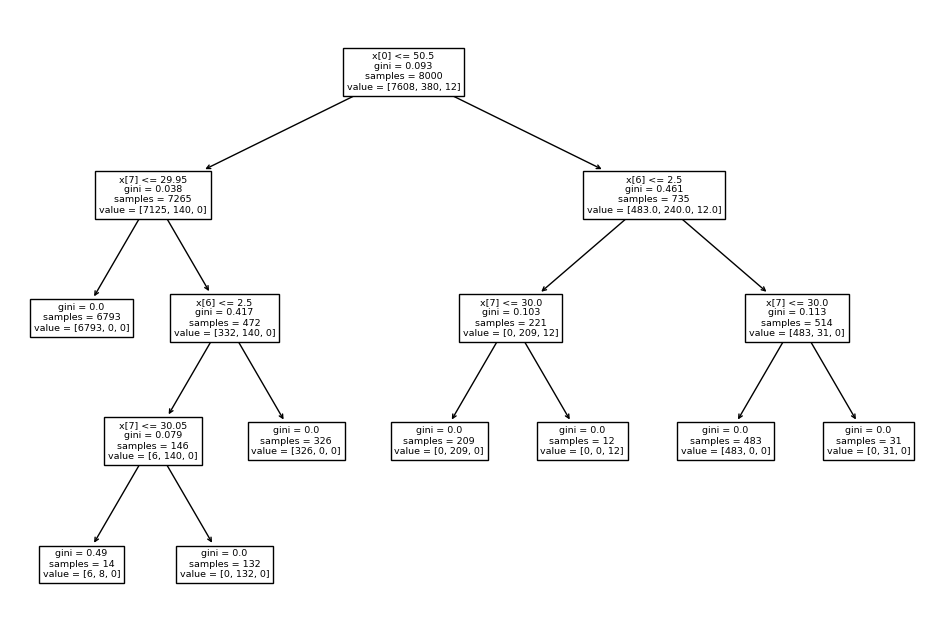

In [33]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train))

## Decision Tree Classifier with criterion entropy

In [34]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [35]:
# Predict the Test set results with criterion entropy
y_pred_en = clf_en.predict(X_test)

In [36]:
# Check accuracy score with criterion entropy
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.9990


[Text(0.4230769230769231, 0.875, 'x[0] <= 50.5\nentropy = 0.292\nsamples = 8000\nvalue = [7608, 380, 12]'),
 Text(0.15384615384615385, 0.625, 'x[7] <= 29.95\nentropy = 0.137\nsamples = 7265\nvalue = [7125, 140, 0]'),
 Text(0.07692307692307693, 0.375, 'entropy = 0.0\nsamples = 6793\nvalue = [6793, 0, 0]'),
 Text(0.23076923076923078, 0.375, 'x[6] <= 2.5\nentropy = 0.877\nsamples = 472\nvalue = [332, 140, 0]'),
 Text(0.15384615384615385, 0.125, 'entropy = 0.247\nsamples = 146\nvalue = [6, 140, 0]'),
 Text(0.3076923076923077, 0.125, 'entropy = 0.0\nsamples = 326\nvalue = [326, 0, 0]'),
 Text(0.6923076923076923, 0.625, 'x[9] <= 1.5\nentropy = 1.022\nsamples = 735\nvalue = [483.0, 240.0, 12.0]'),
 Text(0.5384615384615384, 0.375, 'x[7] <= 30.0\nentropy = 0.329\nsamples = 514\nvalue = [483, 31, 0]'),
 Text(0.46153846153846156, 0.125, 'entropy = 0.0\nsamples = 483\nvalue = [483, 0, 0]'),
 Text(0.6153846153846154, 0.125, 'entropy = 0.0\nsamples = 31\nvalue = [0, 31, 0]'),
 Text(0.846153846153846

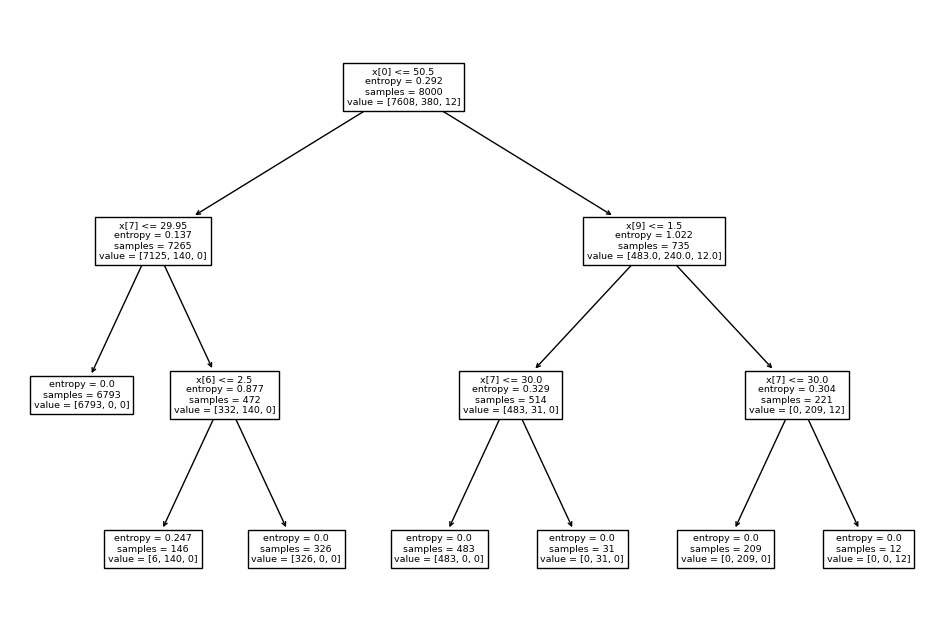

In [37]:
# Visualize decision-trees
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train))

## Naive Bayes

In [38]:
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [39]:
y_pred_nb = nb_classifier.predict(X_test)

In [40]:
# Check accuracy score with naive bayes
from sklearn.metrics import accuracy_score

print('Model accuracy score with naive bayes: {0:0.4f}'. format(accuracy_score(y_test, y_pred_nb)))

Model accuracy score with naive bayes: 0.8995


## Classification Report

In [41]:
# DECISION TREE ENTROPY
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1912
           2       0.99      0.99      0.99        83
           3       1.00      1.00      1.00         5

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [42]:
# DECISION TREE GINI
print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1912
           2       0.99      0.99      0.99        83
           3       1.00      1.00      1.00         5

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [43]:
# DECISION TREE NAIVE BAYES
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           1       0.98      0.91      0.95      1912
           2       0.23      0.61      0.34        83
           3       1.00      0.20      0.33         5

    accuracy                           0.90      2000
   macro avg       0.74      0.58      0.54      2000
weighted avg       0.95      0.90      0.92      2000



In [44]:
# Hasilnya setelah di compare, yang paling akurat itu yang decision tree gini dan entropy, yang naive bayes akurasinya kurang.

In [46]:
import pandas as pd

# Record baru
new_data = {
    'Age': 28,
    'Gender': 1,
    'Country': 2,
    'Occupation': 'Student',
    'Coffee_Intake': 3,
    'Caffeine_mg': 280,
    'Sleep_Hours': 5,
    'Sleep_Quality': 1,
    'BMI': 25.4,
    'Heart_Rate': 85,
    'Stress_Level': 3,
    'Physical_Activity_Hours': 2,
    'Smoking': 1,     
    'Alcohol_Consumption': 1
}

# 1. Convert ke DataFrame
new_df = pd.DataFrame([new_data])

# 2. Encode sama seperti data training (misalnya pakai get_dummies)
new_df_encoded = pd.get_dummies(new_df)

# 3. Samakan kolom dengan X (fitur training)
new_df_encoded = new_df_encoded.reindex(columns=x.columns, fill_value=0)

# 4. Prediksi
prediction_gini = clf_gini.predict(new_df_encoded)

print("Prediction (encoded):", prediction_gini[0])

# 5. Mapping balik hasil prediksi (target = Health_Issues)
class_map = {
    'No Issues': 0,
    'Mild': 1,
    'Moderate': 2,
    'Severe': 3
}
inverse_prediction_gini = {v: k for k, v in class_map.items()}

print(f"The predicted health issue is: {inverse_prediction_gini[prediction_gini[0]]}")

Prediction (encoded): 1
The predicted health issue is: Mild
